In [1]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from scipy import sparse
from numpy import count_nonzero
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
missing_value_formats = ["n.a.", "?", "NA", "n/a", "na", "--"]
scania = pd.read_csv('/content/aps_failure_training_set.csv', na_values = missing_value_formats)

In [3]:
scania.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [4]:
scania.shape

(60000, 171)

In [5]:
scania.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #    Column  Dtype  
---   ------  -----  
 0    class   object 
 1    aa_000  int64  
 2    ab_000  float64
 3    ac_000  float64
 4    ad_000  float64
 5    ae_000  float64
 6    af_000  float64
 7    ag_000  float64
 8    ag_001  float64
 9    ag_002  float64
 10   ag_003  float64
 11   ag_004  float64
 12   ag_005  float64
 13   ag_006  float64
 14   ag_007  float64
 15   ag_008  float64
 16   ag_009  float64
 17   ah_000  float64
 18   ai_000  float64
 19   aj_000  float64
 20   ak_000  float64
 21   al_000  float64
 22   am_0    float64
 23   an_000  float64
 24   ao_000  float64
 25   ap_000  float64
 26   aq_000  float64
 27   ar_000  float64
 28   as_000  float64
 29   at_000  float64
 30   au_000  float64
 31   av_000  float64
 32   ax_000  float64
 33   ay_000  float64
 34   ay_001  float64
 35   ay_002  float64
 36   ay_003  float64
 37   ay_004  float64
 38   ay_0

In [6]:
# Analisando a variável target
scania["class"].value_counts()

class
neg    59000
pos     1000
Name: count, dtype: int64

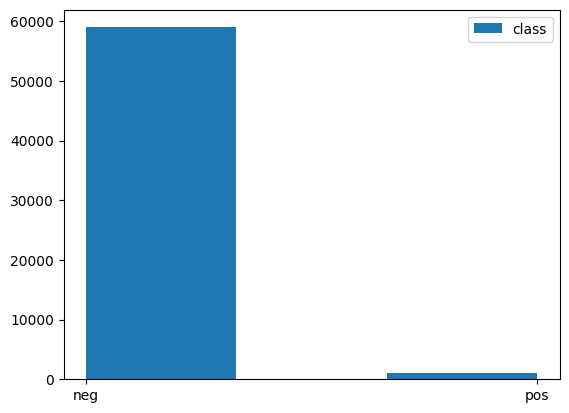

In [7]:
# Observando graficamente a variável target
scania["class"].hist(grid = False, xlabelsize = 10, ylabelsize = 10, legend = "class", bins = 3);

In [8]:
# Observando valores duplicados
scania.duplicated().sum()

0

In [9]:
# Observando a existência de valores nulos
scania.isnull().sum().sum()

850015

In [10]:
# Observando se existem valores nulos na variável alvo
scania["class"].isnull().sum().sum()

0

In [11]:
# Informações estatísticas
scania.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


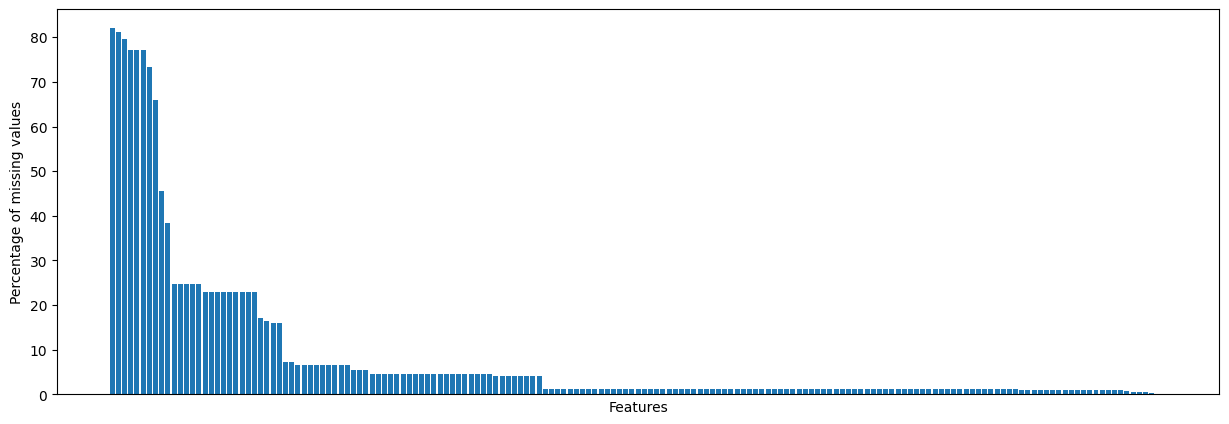

In [12]:
# Calculando a % de valores ausentes para cada variável
nulos = scania.isnull().sum().div(scania.shape[0]).mul(100).to_frame().sort_values(by = 0, ascending = False)

fig, ax = plt.subplots(figsize = (15, 5))
ax.bar(nulos.index, nulos.values.T[0])
plt.xticks([])
plt.xlabel("Features")
plt.ylabel("Percentage of missing values");

In [13]:
# Checando quantas colunas tem valores nulos >= 70%
col_nulo = nulos[nulos[0] > 70]
print("Existem " + str(len(col_nulo)) + "colunas com NaNs igual ou acima 70%.")

Existem 7colunas com NaNs igual ou acima 70%.


In [14]:
# Lista com as colunas com mais de 70% de valores ausentes
col_drop = list(col_nulo.index)
col_drop

['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000']

In [15]:
# Dropando as colunas desnecessárias
scania = scania.drop(columns = ["br_000", "bq_000", "bp_000", "bo_000", "ab_000", "cr_000", "bn_000"])
scania.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [16]:
# Substituindo os valores nulos pela mediana
for i in scania.columns[2:]:
    scania[i] = scania[i].fillna(scania[i].median())

In [17]:
# Conferindo se a substituição foi feita
scania.isnull().sum().sum()

0

In [18]:
# Calculando a dispersão dos dados
sparsity = 1 - count_nonzero(scania) / scania.size
print("A dispersão do dataframe é: " + str(round(sparsity, 2)) + ".")

A dispersão do dataframe é: 0.34.


In [19]:
# Confirmando
sparse.issparse(scania)

False

In [20]:
# Carregando variáveis categóricas
variaveis_categoricas = []
for i in scania.columns[0:165].tolist():
        if scania.dtypes[i] == 'object' or scania.dtypes[i] == 'category':
            variaveis_categoricas.append(i)

In [21]:
variaveis_categoricas

['class']

In [22]:
# Carregando variaveis numéricas para plot
variaveis_numericas = []
for i in scania.columns[0:165].tolist():
        if scania.dtypes[i] == 'int64' or scania.dtypes[i] == 'float64':
            variaveis_numericas.append(i)

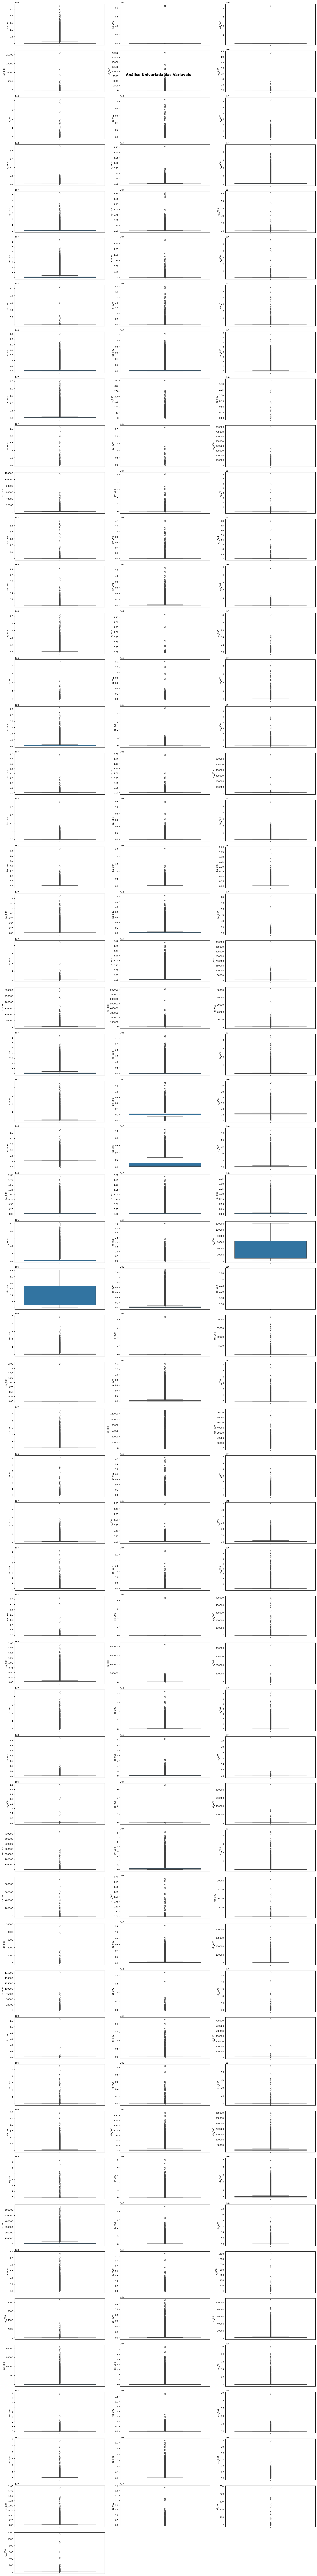

In [23]:
# Carregando boxplot para observar existência de outliers
plt.figure(figsize=(20,250))
plt.suptitle("Análise Univariada das Variáveis", fontsize=16, fontweight='bold')

for i in range(0,len(variaveis_numericas)):
    plt.subplot(85,3,i+1)
    sns.boxplot(scania[variaveis_numericas[i]])
    plt.tight_layout()

In [24]:
# Função para remover os outliers
def remover_outlier(in_data,in_col):

    first_quantile = in_data[in_col].quantile(0.25)
    third_quantile = in_data[in_col].quantile(0.75)
    iqr = third_quantile - first_quantile
    upper_limit = third_quantile + 1.5 * iqr
    lower_limit = first_quantile - 1.5 * iqr
    in_data.loc[(in_data[in_col]>upper_limit), in_col] = upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col] = lower_limit
    return in_data

In [25]:
for i in variaveis_numericas:
    scania = remover_outlier(scania, i)

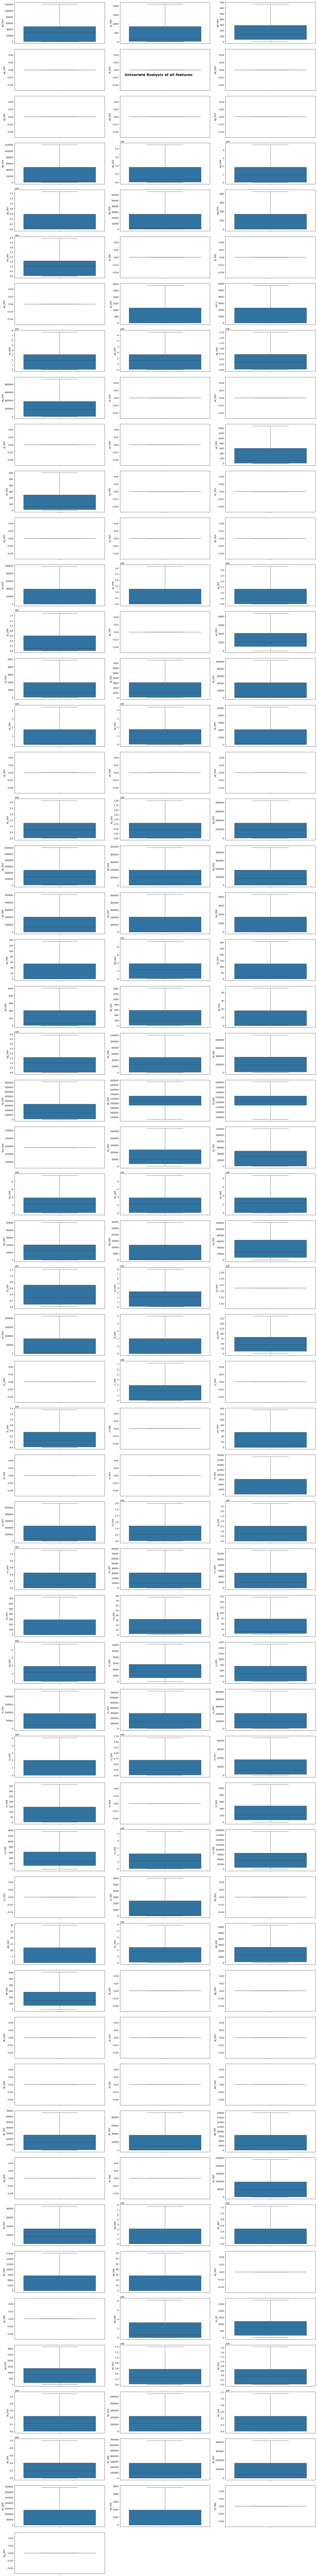

In [26]:
# Conferindo se os outliers foram removidos
plt.figure(figsize=(20,250))
plt.suptitle("Univariate Analysis of all features", fontsize=16, fontweight='bold')

for i in range(0,len(variaveis_numericas)):
    plt.subplot(85,3,i+1)
    sns.boxplot(scania[variaveis_numericas[i]])
    plt.tight_layout()

In [27]:
# Criando o encoder e aplicando LabelEncoder
lb = LabelEncoder()
for var in variaveis_categoricas: # Loop na lista de variáveis actegóricas
    scania[var] = lb.fit_transform(scania[var]) # Convertendo para numérico

In [28]:
# Criando a variável target
target = scania['class']

In [29]:
# Dropando a variável que não serve
preditoras = scania.drop(['class'], axis=1)

In [30]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [31]:
preditoras.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2090.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1083028.5,493384.0,721044.0,469792.0,339156.0,157956.0,73224.00,0.0,0.0,0.0
1,33058,0.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.00,1500.0,0.0,0.0
2,41040,228.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.00,514.0,0.0,0.0
3,12,70.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.00,0.0,0.0,0.0
4,60874,1368.0,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,341813.75,1218.0,0.0,0.0


In [32]:
target.shape

(60000,)

In [33]:
preditoras.shape

(60000, 163)

In [34]:
# Criando o balanceador SMOTE
balanceador = SMOTE()

In [35]:
# Aplicando o balanceador
preditoras_res, target_res = balanceador.fit_resample(preditoras, target)

In [36]:
# Observando se a variável target foi balanceada
target_res.value_counts()

class
0    59000
1    59000
Name: count, dtype: int64

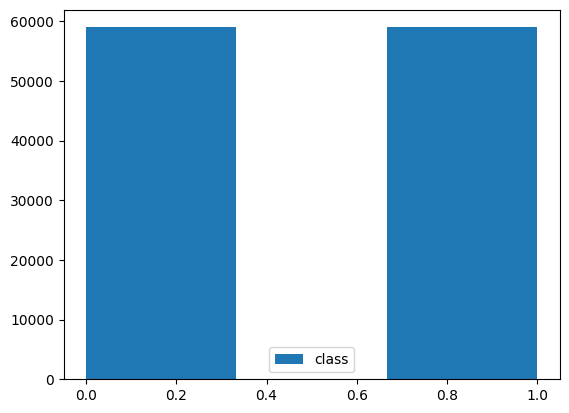

In [37]:
# Observando graficamente
target_res.hist(grid = False, xlabelsize = 10, ylabelsize = 10, legend = "class", bins = 3);

In [38]:
# Quantidade de registros após do balanceamento
preditoras_res.shape

(118000, 163)

In [39]:
# Quantidade de registros após do balanceamento
target_res.shape

(118000,)

In [40]:
# Divisão em Dados de Treino e Teste.
x_treino, x_teste, y_treino, y_teste = train_test_split(preditoras_res, target_res, test_size = 0.3)

In [41]:
# Padronização das Variáveis
padronizador = StandardScaler()
x_treino_padronizado = padronizador.fit_transform(x_treino)
x_teste_padronizado = padronizador.transform(x_teste)

In [42]:
x_treino_padronizado.shape

(82600, 163)

In [43]:
# Visualizando os dados padronizados
x_treino_padronizado

array([[ 0.08212562, -0.79233052, -0.46675949, ...,  1.40957764,
         0.        ,  0.        ],
       [-0.29117469, -0.79233052, -0.46675949, ...,  0.10513008,
         0.        ,  0.        ],
       [ 0.89496144, -0.58994332, -0.46675949, ...,  0.81352625,
         0.        ,  0.        ],
       ...,
       [-0.65788127,  1.99049346,  2.07938944, ..., -0.63863387,
         0.        ,  0.        ],
       [ 0.89496144, -0.58994332, -0.46675949, ..., -0.64591548,
         0.        ,  0.        ],
       [-1.4770129 , -0.74173372, -0.8809205 , ..., -0.64279479,
         0.        ,  0.        ]])

In [44]:
# Criando o classificador com Random Forest
clf = RandomForestClassifier(n_estimators  = 100, criterion = 'entropy', max_depth = 20,
                             max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, n_jobs = 8)

In [45]:
# Construção do modelo
clf = clf.fit(x_treino_padronizado, y_treino)

In [46]:
# Observando a acurácia do modelo
y_pred = clf.predict(x_teste_padronizado)
print(accuracy_score(y_teste, y_pred)*100)

99.38135593220339


In [47]:
# Comparando
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [48]:
y_teste

51209     0
43554     0
99023     1
43040     0
3010      0
         ..
30215     0
110341    1
106222    1
102010    1
26057     0
Name: class, Length: 35400, dtype: int64

In [49]:
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17617
           1       0.99      1.00      0.99     17783

    accuracy                           0.99     35400
   macro avg       0.99      0.99      0.99     35400
weighted avg       0.99      0.99      0.99     35400



In [50]:
cm = confusion_matrix(y_teste, y_pred)
print(cm)

[[17415   202]
 [   17 17766]]


In [51]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Sim","Não"])

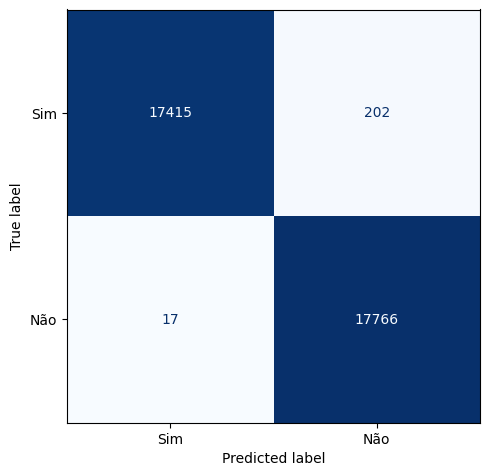

In [52]:
plt.rcParams["figure.figsize"] = [5.00, 5.00]
plt.rcParams["figure.autolayout"] = True
cm_disp.plot(include_values=True,
             cmap='Blues',
             colorbar=None)